In [215]:
# Module Imports

#DB stuff
import mariadb
import sys
import matplotlib.pyplot as plt
import pandas as pd


In [216]:
#Connect with DB
# Connect to MariaDB Platform
try:
    conn = mariadb.connect(
        user="airq",
        password="airq",
        host="localhost",
        port=3306,
        database="airq_data"

    )
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)

# Get Cursor
cur = conn.cursor()


In [217]:
# Ausführen der SQL-Abfrage
sql = "SELECT timestamp, no2, oxygen,cnt10,sound FROM measurements ORDER BY timestamp"

cur.execute(sql)

In [218]:
# Daten abrufen und in ein Pandas DataFrame laden
df = pd.read_sql(sql, conn, index_col="timestamp")

C:\Users\djomo\AppData\Local\Temp\ipykernel_18832\2096923952.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn, index_col="timestamp")


In [219]:
# Schließen der Datenbankverbindung
conn.close()

Text(0.5, 1.0, 'Luftqualität')

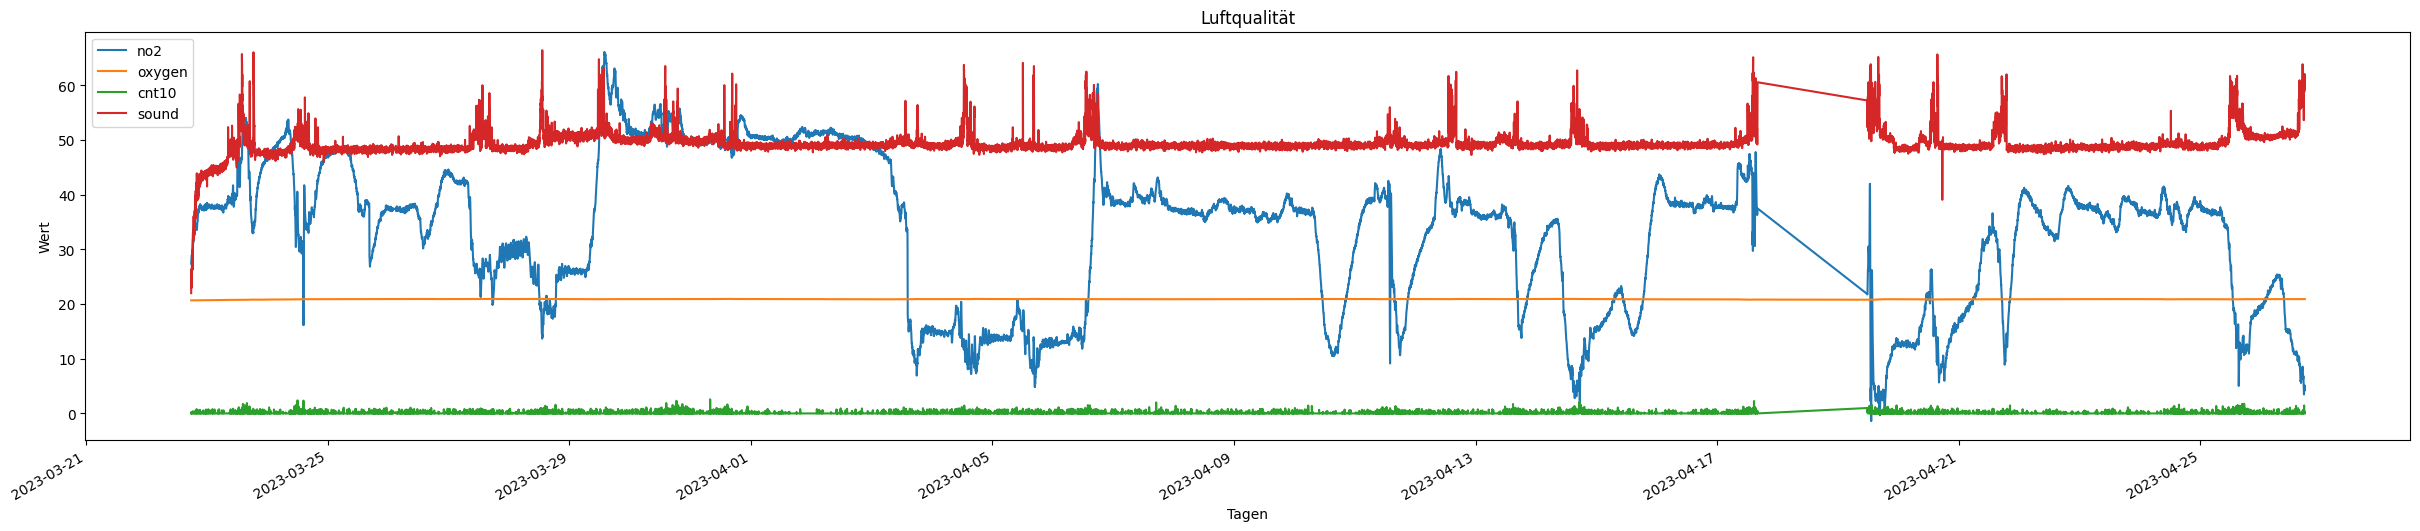

In [220]:
# Zeitreihenplot erstellen
fig, ax = plt.subplots(figsize=(30, 6))
df.plot(ax=ax)

# Erstellen des Plots
ax.set_xlabel("Tagen")
ax.set_ylabel("Wert")
ax.set_title("Luftqualität")